In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance
from tqdm import tqdm
import itertools

In [2]:
def calc_distance(points):
    """ Calculate the euclidean distance between two clusters. """

    total_distance = 0

    for ind in np.arange(1,len(points)):
        curr_distance = distance.euclidean(points[ind-1], points[ind])
        total_distance += curr_distance

    
    return total_distance

In [3]:
def calc_shortest_distance(centroids):

    
    all_permutations = np.array(list(itertools.permutations(centroids)))
    perm_distances = [calc_distance(permutation) for permutation in all_permutations]
    shortest_distance = np.min(perm_distances)
    return shortest_distance
        

In [4]:
def gather_path_info(centroid_df, chosen_clusters, type='kmeans'):

    if type=='ameans':
        chosen_centroids = df_embedding.loc[df_embedding.cluster_id.isin(chosen_clusters), ["centroid_x", "centroid_y"]].values
    elif type=='kmeans':
        chosen_centroids = df_embedding.loc[df_embedding.cluster_id.isin(chosen_clusters), ["kcentroid_x", "kcentroid_y"]].values
    else:
        print("Type has to be kmeans/ameans.")

    n_syll = chosen_centroids.shape[0]
    if n_syll != len(chosen_centroids):
        print("Mismatch in number of syllables and chosen clusters.")

    

    path_length = calc_shortest_distance(chosen_centroids)

    
    return path_length

In [5]:
data_folder = r"C:\Users\rsankar\Documents\Work\Alam JC\Alam JC\Alam JC\Oct 2024\Alam tests\Aux scripts\RangeVsNsyllTest\Results\\"
# results_folder ="/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/RseedTest/Results/"
# centroids_folder = results_folder + '/KCentroids/'
# distances_folder = results_folder + '/KDistances/'


In [6]:
embedding_file = data_folder + 'centroids__3344769.csv'

In [7]:
# Read the CSV file into a DataFrame
df_embedding = pd.read_csv(embedding_file)
print(df_embedding.head())

   cluster_id  centroid_x  centroid_y  kcentroid_x  kcentroid_y  bird_id  \
0         0.0    3.535255   -4.860736     3.287780    -4.501783      0.0   
1         1.0  -14.329256   -5.790513   -14.452105    -5.823099      0.0   
2         2.0    0.294664   17.313989     0.136817    17.800746      0.0   
3         3.0    3.884999   -8.418233     4.074479    -8.920797      0.0   
4         4.0   -9.995483    3.241581   -12.020067     3.986688      0.0   

   range_0_min  range_1_min  range_0_max  range_1_max  
0   -15.499041   -16.618896    17.585873    18.215986  
1   -15.499041   -16.618896    17.585873    18.215986  
2   -15.499041   -16.618896    17.585873    18.215986  
3   -15.499041   -16.618896    17.585873    18.215986  
4   -15.499041   -16.618896    17.585873    18.215986  


In [8]:
n_iter =  50
n_clusters = 8
path_lenghts = np.zeros((n_clusters+1, n_iter))

In [9]:
path_lengths_dict = {
    'n_clusters': [],
    'iteration': [],
    'kdistance': [],
    'distance': []
}

In [10]:
np.random.seed(0)

In [11]:

for n_cluster in range(2, n_clusters+1):
    for iter in tqdm(range(n_iter)):
        # Choose n_cluster centroids
        chosen_clusters = df_embedding.sample(n=n_cluster).cluster_id.values
        print(chosen_clusters)
        kdist = gather_path_info(df_embedding, chosen_clusters, type='kmeans')
        dist = gather_path_info(df_embedding, chosen_clusters, type='ameans')
        # Calc path
        path_length = kdist

        path_lenghts[n_cluster, iter] = path_length
        path_lengths_dict['n_clusters'].append(n_cluster)
        path_lengths_dict['iteration'].append(iter)
        path_lengths_dict['kdistance'].append(kdist)
        path_lengths_dict['distance'].append(dist)
    # break




100%|██████████| 50/50 [00:00<00:00, 1170.52it/s]


[114.  62.]
[ 92. 141.]
[ 85. 137.]
[114.  49.]
[ 15. 143.]
[38. 46.]
[92. 75.]
[25. 73.]
[ 6. 92.]
[132.  90.]
[74. 60.]
[ 98. 138.]
[49. 24.]
[23. 66.]
[133.  79.]
[ 26. 142.]
[ 81. 122.]
[ 84. 133.]
[68.  2.]
[111.   9.]
[  4. 138.]
[50. 85.]
[33. 15.]
[73. 59.]
[40. 46.]
[110. 109.]
[105.  42.]
[35. 93.]
[ 4. 65.]
[19. 80.]
[ 0. 19.]
[21. 99.]
[77. 27.]
[51. 16.]
[113.   7.]
[23. 49.]
[107.  85.]
[125. 115.]
[55. 45.]
[39. 79.]
[97. 99.]
[125. 101.]
[143.  97.]
[135.  85.]
[85. 19.]
[25. 12.]
[116.  14.]
[112. 119.]
[39. 22.]
[  3. 113.]


100%|██████████| 50/50 [00:00<00:00, 1145.41it/s]


[133.  55.  23.]
[ 83. 143.   4.]
[119.  22.  21.]
[14. 71. 24.]
[78. 74. 70.]
[ 62. 133.  49.]
[ 90.  88. 116.]
[149.  90. 114.]
[ 85.  22. 116.]
[114. 106. 131.]
[113.  58.  70.]
[135.  77.  21.]
[132.  51.  41.]
[132.  66.  76.]
[84. 89. 10.]
[44. 11. 26.]
[103. 126.  93.]
[ 10. 117.  21.]
[  2. 122.  91.]
[ 97.  90. 149.]
[26. 32. 54.]
[70. 84. 72.]
[ 97. 121. 148.]
[117. 122.  72.]
[ 33.  46. 137.]
[ 74.  31. 111.]
[55. 43. 90.]
[106. 123.  22.]
[  0.  89. 101.]
[ 11. 112.  78.]
[  4.  41. 106.]
[137.  33. 118.]
[108. 149.   3.]
[ 1. 14. 36.]
[  7. 121.  66.]
[122. 116. 102.]
[ 38. 107. 139.]
[ 95. 147.  73.]
[83. 59. 22.]
[ 57.  58. 127.]
[117. 146.  94.]
[32. 96. 11.]
[11. 32. 96.]
[ 47. 116.  13.]
[ 21. 138.  94.]
[119.   6.  19.]
[65. 42. 24.]
[105.  47. 117.]
[129.  41.  32.]
[27. 18. 81.]


  0%|          | 0/50 [00:00<?, ?it/s]

[ 25.  12.  64. 120.]
[148.  55.  72.  67.]
[97. 91. 78. 65.]
[129.   0. 117.  11.]
[ 72.  23. 107.  31.]
[133. 129.  43.  76.]
[ 95. 101. 102. 113.]
[23. 93. 86. 26.]
[46. 44. 73. 77.]
[ 62.  86.  75. 145.]
[104. 106.  51. 101.]
[19. 87. 94. 61.]
[146. 134. 142. 132.]
[66. 25. 90. 18.]
[76. 94. 56. 97.]
[ 92.  12.  98. 107.]
[ 15.  84. 148.  68.]
[ 33.  89. 106.  63.]
[ 45.  88.  29. 119.]
[ 16. 137. 130.  85.]
[  6. 128. 117.  43.]
[ 16.  53.  82. 143.]
[90.  8. 66. 19.]
[79. 71. 86.  6.]
[20. 73. 46. 97.]
[ 26.   0.  61. 101.]
[ 78. 128. 123. 117.]
[ 59. 104.  49.  68.]
[ 13.  81. 135. 145.]
[113. 139.  26.  94.]
[  5. 103. 133.  64.]
[143.  14.  72.   4.]
[129.  53.  10.  54.]
[ 51.  84. 123.  89.]
[ 63. 119.  33.  21.]
[101.  30.  19.  11.]
[11. 49. 95. 96.]
[46. 30. 52. 28.]
[ 19. 120.  21. 100.]
[ 74.  17. 140.  23.]
[111. 126.  82.  67.]
[10. 97. 39. 79.]
[ 78.  81.  29. 100.]
[ 19.  31.  90. 113.]
[59. 94. 81. 60.]


100%|██████████| 50/50 [00:00<00:00, 708.19it/s]


[102. 125.  43. 112.]
[ 69. 122.  18. 121.]
[ 38.  24. 140.  46.]
[ 81.  43. 120. 138.]
[ 34. 114.  90.  66.]


  0%|          | 0/50 [00:00<?, ?it/s]

[142.  95.  80.   7.  22.]
[148.  56.  52.  10.  11.]
[ 96.  10. 125.  83.  53.]
[ 28.  75.  92.  81. 118.]
[ 81. 115.  78.  22.  40.]
[ 52.  14.   9. 147. 118.]
[103.  90.  10. 105.  61.]
[126. 129. 102. 148. 106.]
[  4.  35.  23. 130.  33.]
[ 36.  33. 117.  89.  65.]
[114.  57.  14. 118. 143.]
[145.  54.  67.  29.  58.]
[122. 127. 128.  22. 109.]
[  8. 129. 145. 120.  19.]
[141.  63. 113.  34.  57.]
[ 91. 121.   3. 142.  56.]
[ 75.  59.  79.  25. 116.]


 40%|████      | 20/50 [00:00<00:00, 196.30it/s]

[120.   6.  34.  94.  73.]
[142.  76.  11.  27.  78.]
[131.  22. 116.  15.  62.]
[88. 49.  5. 98. 40.]
[142. 130.  21.  26.  19.]
[130.  99. 106.  55.  52.]
[125. 130.  64.  84. 140.]
[105.  59.  81.  65. 141.]
[ 51.  66.  26. 133.  71.]
[119. 109.   7.  75. 121.]
[ 42.  31. 114.  59. 144.]
[ 41. 148.  44.  50.  21.]
[ 44.   4. 110. 105.  55.]
[116. 148.  90.   8.   4.]
[ 68.  32.  48. 105.  52.]
[146.  82. 119.  80.  73.]
[133.  28. 138.  94. 142.]
[ 34.  89. 122.   6.  86.]
[ 48.  35. 109.  57. 125.]
[ 16.  61.  64.  42. 127.]
[  9. 104. 114. 132. 138.]
[122.  59.  12.  43.   8.]


100%|██████████| 50/50 [00:00<00:00, 201.70it/s]

[59.  1. 24. 58. 15.]
[103.  34. 101.  62. 129.]
[141. 107.  92.  71. 130.]
[ 24.  33. 114.  23. 126.]
[ 48. 137.  45. 141.  91.]
[114.  69. 110.  63. 146.]
[45. 21. 33. 74. 92.]
[ 26.   0.  54. 146.  19.]
[38. 94. 31. 42. 47.]
[ 16. 112.  78.  42.  57.]
[116. 134.  72.  10. 129.]



  0%|          | 0/50 [00:00<?, ?it/s]

[ 70.  30.  17.  76. 117.  94.]
[ 36.  69. 119.  19.   8.  24.]
[ 91.  61. 140.  92.  27.  57.]


  8%|▊         | 4/50 [00:00<00:01, 32.37it/s]

[19. 95. 57. 36. 48. 75.]
[121.  58.  71. 104.  36.  89.]
[133. 115.  40.  58. 108. 112.]
[135.  18.  81. 119.  87. 120.]
[139.  19. 131. 123. 112.  87.]


 16%|█▌        | 8/50 [00:00<00:01, 32.80it/s]

[132.  53.  58. 119.  48. 126.]
[147.  90. 104.   5. 107. 106.]
[107.  40.  79.  61. 147.  74.]


 24%|██▍       | 12/50 [00:00<00:01, 32.28it/s]

[134. 109.  26.  52.  76.  43.]
[115. 110. 107. 111.  53.  72.]
[38. 23. 53. 60. 90. 87.]
[118.  25.  68.  36.  32.  28.]
[ 25.  53.  20. 123.  22.  71.]


 32%|███▏      | 16/50 [00:00<00:01, 32.35it/s]

[136. 125.  80.  15.  32. 127.]
[122. 120. 147.  78. 144.  37.]
[ 34. 125.  55. 128.  57. 147.]


 40%|████      | 20/50 [00:00<00:00, 32.42it/s]

[142.  78. 144.  22. 121.  54.]
[72. 33. 31. 62. 71.  0.]
[ 35.  66.  47.  94. 103.  85.]
[138.   0.  75.  89. 131.  17.]


 48%|████▊     | 24/50 [00:00<00:00, 32.07it/s]

[120.  72.  36.  99.  70.   9.]
[75. 92. 72. 63. 60. 86.]
[ 59.  67.  91. 144. 101.  45.]
[ 96.  93.  83. 127. 148. 134.]


 56%|█████▌    | 28/50 [00:00<00:00, 30.78it/s]

[ 96.  78. 129.  38.  94.  95.]
[117.  67. 126.   6. 147. 127.]
[ 65. 147.  38.  18.   0.  76.]


 64%|██████▍   | 32/50 [00:01<00:00, 30.73it/s]

[ 22. 107.  92. 108.  76.  90.]
[ 59.  38.  91. 103.   1. 142.]
[ 81. 143.  28.  66. 106.  43.]
[ 45.  23.  52. 108.  40. 104.]


 72%|███████▏  | 36/50 [00:01<00:00, 30.98it/s]

[ 93.  53.  36.  45.  62. 146.]
[ 82.  74.  49. 135. 103.  60.]


 80%|████████  | 40/50 [00:01<00:00, 31.46it/s]

[ 57. 131. 141. 105.  31.  42.]
[107.  57.  51.  19.  15.  94.]
[119. 110. 123. 117. 139.  99.]
[ 96. 141.  19.  17.  30.  92.]
[ 20. 120.  18.  68.  14. 149.]
[143. 125.   4.  72.  46. 129.]
[ 74.  40.  86. 149.  11. 146.]
[ 45.  33. 146.  57. 141. 114.]


 88%|████████▊ | 44/50 [00:01<00:00, 31.92it/s]

[ 83.  60.  51.  54. 132.  70.]
[147.  93.   0. 116.  87.  62.]
[  1. 102.  66. 107.  57.  37.]
[  8. 120.  65.  37.  57.   9.]


100%|██████████| 50/50 [00:01<00:00, 31.77it/s]

[ 17.  50. 131. 104.  15. 149.]
[136.  71. 103.  24.  34.  97.]



  2%|▏         | 1/50 [00:00<00:11,  4.34it/s]

[ 97.  38.   5. 134.  66.  42. 121.]


  4%|▍         | 2/50 [00:00<00:10,  4.41it/s]

[108. 132. 111.  43. 149.   8. 138.]
[120.  87. 137.  11.   0.  20.  72.]


  8%|▊         | 4/50 [00:00<00:10,  4.33it/s]

[146.  93.   0. 132.  33.  28.  54.]


 10%|█         | 5/50 [00:01<00:10,  4.38it/s]

[ 30. 145.  36.  40.   3.  54. 106.]


 12%|█▏        | 6/50 [00:01<00:09,  4.50it/s]

[146. 103. 100.  54.  42.   5. 148.]


 14%|█▍        | 7/50 [00:01<00:10,  4.14it/s]

[  0. 106.  35.  77. 108. 112.  49.]


 16%|█▌        | 8/50 [00:01<00:09,  4.30it/s]

[ 97.  66.  56.  46. 126. 105.  91.]


 18%|█▊        | 9/50 [00:02<00:09,  4.43it/s]

[ 12.  66.  91.  31.  55. 114.  42.]


 20%|██        | 10/50 [00:02<00:08,  4.47it/s]

[114.   1.  37.  42. 140. 149.  59.]


 22%|██▏       | 11/50 [00:02<00:08,  4.59it/s]

[ 42.   2.  28.  67.  78. 122.  76.]


 24%|██▍       | 12/50 [00:02<00:08,  4.59it/s]

[127. 138.  77.   0. 106.   8.  23.]


 26%|██▌       | 13/50 [00:02<00:08,  4.61it/s]

[105. 119. 121.  83. 100. 135.  39.]


 28%|██▊       | 14/50 [00:03<00:07,  4.63it/s]

[ 36. 103.  93. 104.  89.  17.  25.]


 30%|███       | 15/50 [00:03<00:07,  4.63it/s]

[ 53.  46.  16. 141.  28. 133. 134.]


 32%|███▏      | 16/50 [00:03<00:07,  4.66it/s]

[111. 136. 146. 126.  79.  30.  38.]


 34%|███▍      | 17/50 [00:03<00:07,  4.65it/s]

[ 53.  32.  40. 142.  24. 122.  11.]


 36%|███▌      | 18/50 [00:04<00:07,  4.50it/s]

[ 72.  39. 110.  83. 147.  45.  74.]


 38%|███▊      | 19/50 [00:04<00:06,  4.54it/s]

[ 27.  56. 119. 141.  59.  54.  82.]


 40%|████      | 20/50 [00:04<00:06,  4.55it/s]

[131.  21.  89. 124.  93. 139.  31.]
[ 95.  18.  13. 110.  66.  32.  42.]


 44%|████▍     | 22/50 [00:04<00:06,  4.52it/s]

[100.  57.  26. 141.  59.  55.  93.]


 46%|████▌     | 23/50 [00:05<00:05,  4.50it/s]

[109.  95. 149.  39.  28.  43.  26.]


 48%|████▊     | 24/50 [00:05<00:05,  4.59it/s]

[ 25.  81. 107. 113.  55.  66.   5.]


 50%|█████     | 25/50 [00:05<00:05,  4.61it/s]

[ 78.  95.  59.  19.  58.   9. 103.]


 52%|█████▏    | 26/50 [00:05<00:05,  4.63it/s]

[49. 10. 69. 98. 68.  6. 99.]


 54%|█████▍    | 27/50 [00:05<00:04,  4.64it/s]

[ 15. 102.  64.  82.  73. 120. 113.]


 56%|█████▌    | 28/50 [00:06<00:04,  4.60it/s]

[ 70.  71.  10. 136.  73. 127. 135.]


 58%|█████▊    | 29/50 [00:06<00:04,  4.65it/s]

[115.  87. 136. 138.   3.  82.  32.]


 60%|██████    | 30/50 [00:06<00:04,  4.59it/s]

[132.  63.  42.  33.  97.   0. 124.]


 62%|██████▏   | 31/50 [00:06<00:04,  4.62it/s]

[ 53.  42. 108. 120.   5. 109. 110.]


 64%|██████▍   | 32/50 [00:07<00:04,  4.48it/s]

[  9.  85.  18.  42.  22. 110.  91.]


 66%|██████▌   | 33/50 [00:07<00:03,  4.48it/s]

[ 81.  11.   8.  14.  26.  83. 118.]


 68%|██████▊   | 34/50 [00:07<00:03,  4.47it/s]

[117. 123. 128. 115.  98.  13.  61.]


 70%|███████   | 35/50 [00:07<00:03,  4.46it/s]

[  9. 139.  15.  95.  68.  69.  44.]


 72%|███████▏  | 36/50 [00:07<00:03,  4.47it/s]

[ 72. 117.   5.  62.  13.  46.   3.]


 74%|███████▍  | 37/50 [00:08<00:02,  4.43it/s]

[ 63.  13.  68.  56. 136.  12.  17.]


 76%|███████▌  | 38/50 [00:08<00:02,  4.46it/s]

[131. 137.  15.  38.  27.  16. 143.]


 78%|███████▊  | 39/50 [00:08<00:02,  4.48it/s]

[119.  17.  59. 122.  44.  14.  48.]


 80%|████████  | 40/50 [00:08<00:02,  4.57it/s]

[ 11.  72.   7.   1. 118.  65. 111.]
[ 52.  23. 102. 134. 120. 141.  64.]


 84%|████████▍ | 42/50 [00:09<00:01,  4.53it/s]

[ 31.  65. 113. 111.  84. 132.  34.]


 86%|████████▌ | 43/50 [00:09<00:01,  4.57it/s]

[146.  28. 149.  39.  79. 100.  53.]
[128. 131.  79.   5.  67.  68.  45.]


 90%|█████████ | 45/50 [00:09<00:01,  4.44it/s]

[ 73. 109.  30.  67.  48.  59.  89.]


 92%|█████████▏| 46/50 [00:10<00:00,  4.46it/s]

[ 11.  34.  43. 127. 143. 109.  99.]


 94%|█████████▍| 47/50 [00:10<00:00,  4.54it/s]

[ 63.  77. 138. 132.  29.  51.  28.]


 96%|█████████▌| 48/50 [00:10<00:00,  4.63it/s]

[ 30. 113.  73.  39.  58. 142. 118.]


 98%|█████████▊| 49/50 [00:10<00:00,  4.61it/s]

[124.  28.  74.  86.  77. 130.  66.]


100%|██████████| 50/50 [00:11<00:00,  4.60it/s]

[ 88.   1.  55.  24. 130. 108.  61.]


  0%|          | 0/50 [00:00<?, ?it/s]

[ 13.  76.  99.  10.  79. 121. 143.  29.]


  2%|▏         | 1/50 [00:02<01:40,  2.05s/it]

[ 33. 135.  46. 142.  86.  71.  84.  55.]


  4%|▍         | 2/50 [00:04<01:38,  2.04s/it]

[ 86. 141. 125.  56.  99.  73.  45. 108.]


  6%|▌         | 3/50 [00:06<01:34,  2.01s/it]

[ 30. 114. 116.  31. 143. 118.  57. 133.]


  8%|▊         | 4/50 [00:08<01:32,  2.00s/it]

[129.  65.  58.  59.  80. 148.  77. 104.]


 10%|█         | 5/50 [00:10<01:30,  2.00s/it]

[142. 129.  65.  37. 101. 105. 116. 127.]


 12%|█▏        | 6/50 [00:12<01:28,  2.00s/it]

[116. 113.  12.  92. 103.  85.  51. 140.]


 14%|█▍        | 7/50 [00:14<01:26,  2.02s/it]

[113.  39.  21. 140. 109.  86. 139.  84.]


 16%|█▌        | 8/50 [00:16<01:25,  2.03s/it]

[ 81.  64.  30. 137.  13. 107. 104.  15.]


 18%|█▊        | 9/50 [00:18<01:24,  2.05s/it]

[121.  53. 103.  54. 132.  32.  95.  25.]


 20%|██        | 10/50 [00:20<01:21,  2.05s/it]

[ 65. 147.  23.  60.  19. 146.  57. 122.]


 22%|██▏       | 11/50 [00:22<01:19,  2.04s/it]

[ 86.  17.   0.   2.  72.  77.  44. 127.]


 24%|██▍       | 12/50 [00:24<01:17,  2.05s/it]

[149.  93.  32.   0. 104.  34.  55. 139.]


 26%|██▌       | 13/50 [00:26<01:15,  2.03s/it]

[141.  56.  27. 143.  91.  55. 146.  15.]


 28%|██▊       | 14/50 [00:28<01:13,  2.04s/it]

[ 29. 114.  70.  84.  85.  64.  17. 138.]


 30%|███       | 15/50 [00:30<01:11,  2.04s/it]

[ 82.  34. 116.   8. 102.  38.   2. 107.]


 32%|███▏      | 16/50 [00:32<01:09,  2.03s/it]

[ 40. 114. 109.  69.  38. 121. 147.  98.]


 34%|███▍      | 17/50 [00:34<01:07,  2.04s/it]

[ 72.  54.  89. 132. 118.  33. 128. 111.]


 36%|███▌      | 18/50 [00:36<01:04,  2.02s/it]

[129.  64.  89.   9.  24.  15.  65. 148.]


 38%|███▊      | 19/50 [00:38<01:02,  2.02s/it]

[137. 143.  76.  33.  93.  44.  43.   9.]


 40%|████      | 20/50 [00:40<01:00,  2.01s/it]

[127. 121.  60.  27. 133.  57. 147.  21.]


 42%|████▏     | 21/50 [00:42<00:58,  2.02s/it]

[103.  83.  53.  18.  21. 132.  15. 147.]


 44%|████▍     | 22/50 [00:44<00:56,  2.03s/it]

[103.  19. 137.  71.  66. 105. 138. 123.]


 46%|████▌     | 23/50 [00:46<00:55,  2.04s/it]

[ 16.  86.  38.   9. 129.  45.  85.  92.]


 48%|████▊     | 24/50 [00:48<00:53,  2.06s/it]

[ 62. 147. 141.  68.  44. 148.  16.  65.]


 50%|█████     | 25/50 [00:50<00:51,  2.07s/it]

[ 25.  49. 125.  94.  90. 104.  22. 135.]


 52%|█████▏    | 26/50 [00:53<00:50,  2.09s/it]

[  4.  91.  87. 141.  83.  36.  51. 118.]


 54%|█████▍    | 27/50 [00:55<00:47,  2.07s/it]

[ 73.  68.  95.  97. 130.  18.  57.  82.]


 56%|█████▌    | 28/50 [00:57<00:45,  2.07s/it]

[106.  16.  69. 120.  35.  95.  48.  34.]


 58%|█████▊    | 29/50 [00:59<00:43,  2.08s/it]

[ 84.  56.   3. 109.  83.  59.  27.  31.]


 60%|██████    | 30/50 [01:01<00:41,  2.05s/it]

[ 46. 102.  64. 128.  50. 138.  67.   4.]


 62%|██████▏   | 31/50 [01:03<00:38,  2.03s/it]

[  7. 104.  92.  60. 127.  86.  26.  29.]


 64%|██████▍   | 32/50 [01:05<00:36,  2.03s/it]

[ 13. 136. 144. 148.  57.  54.  70.   7.]


 66%|██████▌   | 33/50 [01:07<00:34,  2.02s/it]

[ 10. 113. 144.  53. 136. 112.  17.  44.]


 68%|██████▊   | 34/50 [01:09<00:32,  2.01s/it]

[ 46.  18.  83.  71. 115.   3.  64.  23.]


 70%|███████   | 35/50 [01:11<00:30,  2.01s/it]

[123. 118.  53. 104.  97. 114. 124.  65.]


 72%|███████▏  | 36/50 [01:13<00:28,  2.03s/it]

[ 32.  68. 126.  20.  89. 143.  63.  55.]


 74%|███████▍  | 37/50 [01:15<00:26,  2.02s/it]

[ 76. 137.  19.  68.  13. 141.  87. 121.]


 76%|███████▌  | 38/50 [01:17<00:24,  2.02s/it]

[132.  40. 120.  42.  92.  99.  17.  33.]


 78%|███████▊  | 39/50 [01:19<00:22,  2.02s/it]

[ 13.  20.   2. 146.   6.  76. 123.  32.]


 80%|████████  | 40/50 [01:21<00:20,  2.04s/it]

[ 69.  72.   2.  36. 138.  80.  34. 100.]


 82%|████████▏ | 41/50 [01:23<00:18,  2.03s/it]

[ 16.   6.  94. 133.  12. 147.  54.   4.]


 84%|████████▍ | 42/50 [01:25<00:16,  2.03s/it]

[ 23.  83. 119. 101. 116. 106. 108.   6.]


 86%|████████▌ | 43/50 [01:27<00:14,  2.03s/it]

[ 70.  40.  89. 128.   8.   3.  14.  41.]


 88%|████████▊ | 44/50 [01:29<00:12,  2.07s/it]

[100.  33. 147.  79. 109. 133.  59. 119.]


 90%|█████████ | 45/50 [01:31<00:10,  2.09s/it]

[ 40. 122. 107.  15. 114.   6.  49.  72.]


 92%|█████████▏| 46/50 [01:33<00:08,  2.07s/it]

[ 76.  94.   2.  83. 113.  66. 101. 115.]


 94%|█████████▍| 47/50 [01:35<00:06,  2.07s/it]

[ 81.   7. 108.  94.  13.   9.  50.  63.]


 96%|█████████▌| 48/50 [01:37<00:04,  2.07s/it]

[ 83.  90.  76.   0.  89.  58.  54. 148.]


 98%|█████████▊| 49/50 [01:40<00:02,  2.07s/it]

[121.   2.   7. 104.  97. 101.  58.  38.]


100%|██████████| 50/50 [01:42<00:00,  2.04s/it]


In [12]:
path_lengths_df = pd.DataFrame(path_lengths_dict)
print(path_lengths_df.head())

   n_clusters  iteration  kdistance   distance
0           2          0  18.451511  18.224031
1           2          1   5.077015   5.707980
2           2          2   6.285599   5.855881
3           2          3   5.377060   5.305571
4           2          4  24.153990  23.988792


In [13]:
output_file = data_folder + 'path_lengths.csv'
path_lengths_df.to_csv(output_file, index=False)


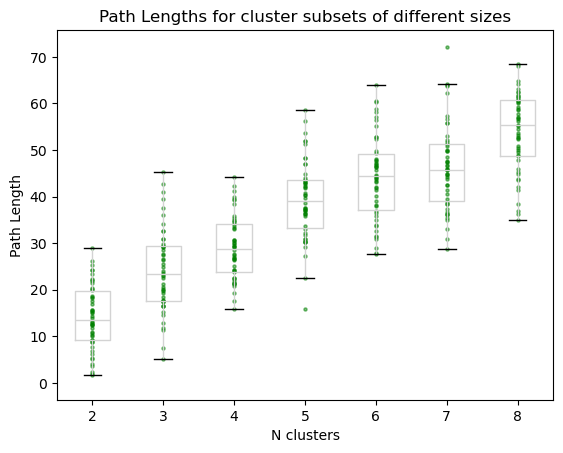

In [30]:
for n_cluster in range(n_clusters+1):
    plt.scatter(np.zeros((n_iter))+n_cluster, path_lenghts[n_cluster], c='g', marker='.', s=20, alpha=.5)


plt.boxplot(path_lenghts.T,
        positions=np.arange(n_clusters+1), 
        patch_artist=False,  # fill with color
        boxprops=dict(color='lightgrey'),
        whiskerprops=dict(color='lightgrey'),
        showfliers = False,
        medianprops = dict(color='lightgrey')
        ) 

plt.xlabel('N clusters')
plt.ylabel('Path Length')
plt.title('Path Lengths for cluster subsets of different sizes')
plt.xlim(1.5, n_clusters+.5)
plt.show()

In [15]:
plt.savefig(data_folder + 'path_lengths_plot.png')

<Figure size 640x480 with 0 Axes>